In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'y_MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  y_MEDV   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


potencialmente o atributo B é problematico, pois trata-se do número de habitantes negros na área em questão

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Organize data for training

In [5]:
y = df.y_MEDV
X = df.drop(
    [
        "y_MEDV"
    ], axis=1
)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [7]:
import xgboost as xgb

# XGBOOST prediction

In [8]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
y_pred = model.predict(X_test)

# Analise results

In [10]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [11]:
plt.figure(figsize=(10,10))
fig = px.scatter(x=y_test, y=y_pred)
fig.update_layout(
    xaxis = dict(
        title="actual"
    ),
    yaxis = dict(
        title="pred"
    )
)
fig.add_trace(
    go.Scatter(x=y_test, y=y_test, name = "target")
)
fig.show()

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 0, 'actual')

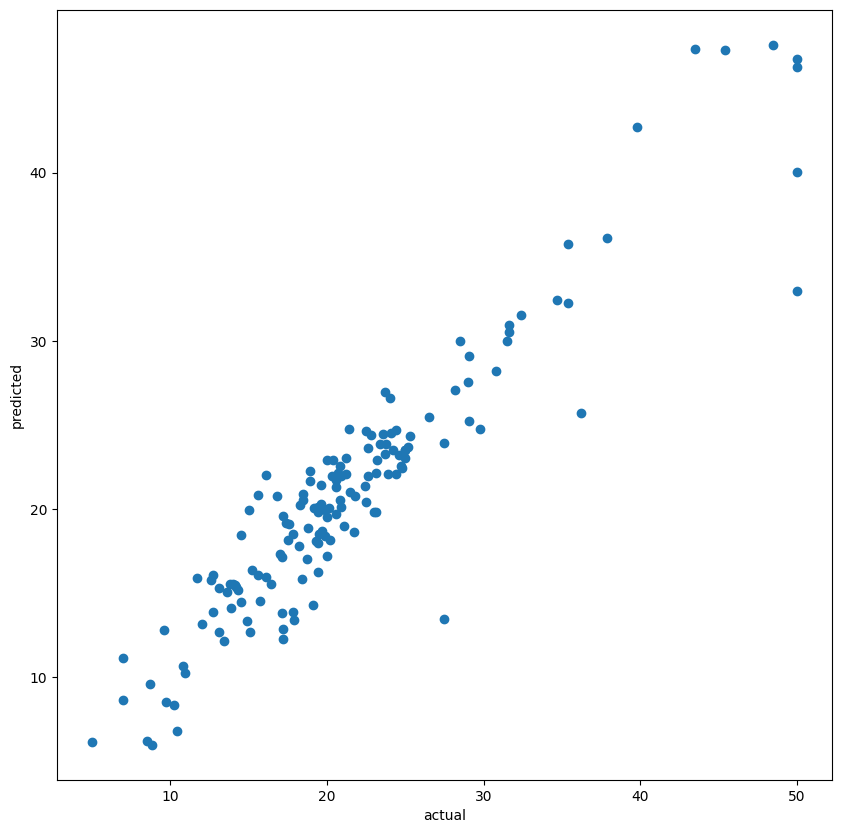

In [12]:
plt.figure(figsize=(10,10))
#abline(1, 0)
plt.scatter(y_test, y_pred)

plt.ylabel("predicted")
plt.xlabel("actual")

# SHAP

In [13]:
import shap
shap.initjs

/Users/bernardorusso/Documents/GitHub/pos-grad-tcc-study/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



<function shap.plots._force.initjs()>

In [14]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

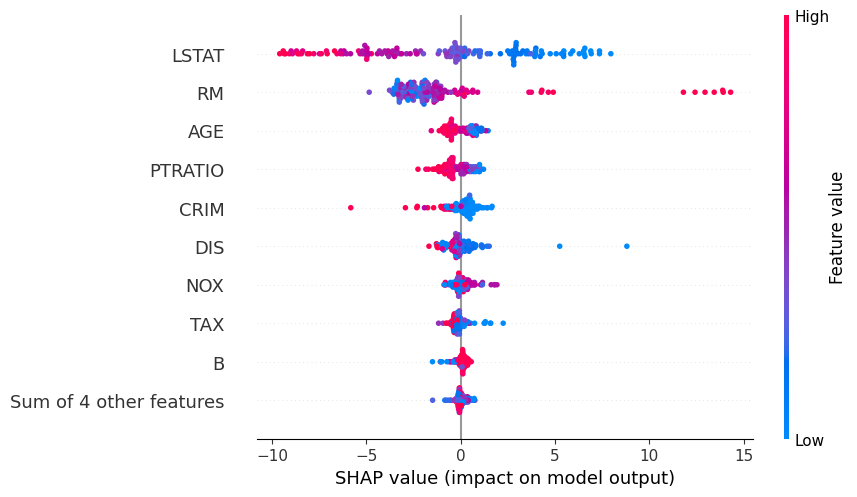

In [15]:
shap.plots.beeswarm(shap_values)

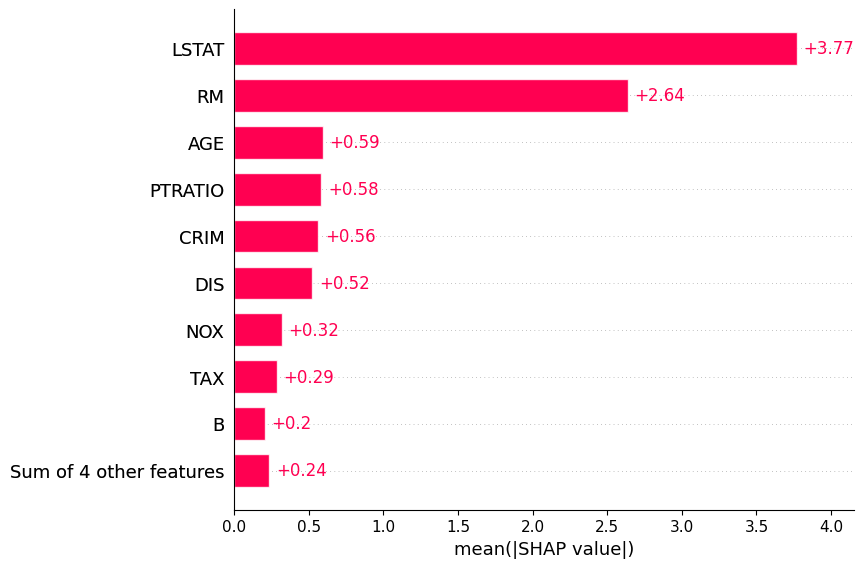

In [16]:
shap.plots.bar(shap_values)

# ICE & PDP

In [17]:
from sklearn.inspection import PartialDependenceDisplay

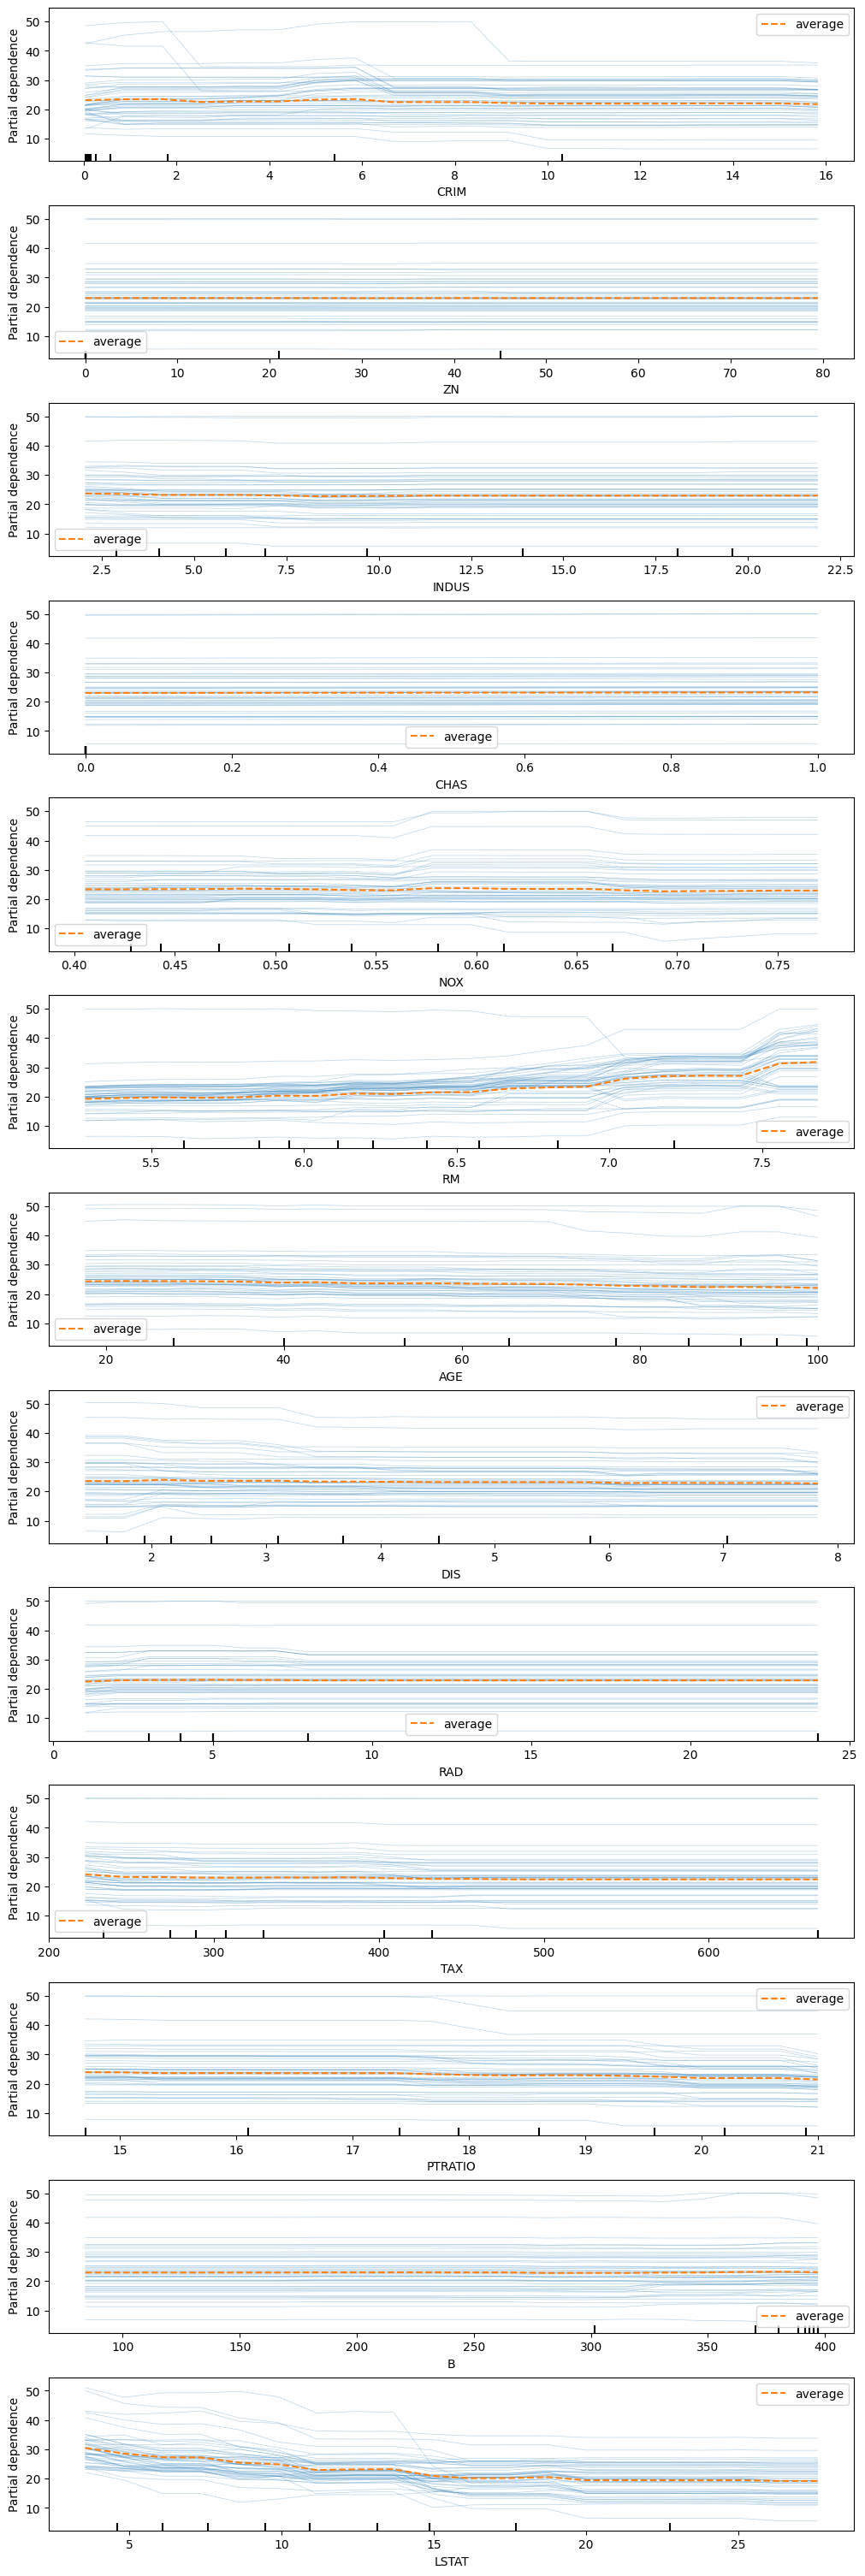

In [18]:
common_params= {
    "subsample":50,
    "n_jobs":2,
    "grid_resolution":20,
    "random_state":42
}
features_info={
    "features":[
        'CRIM', 
        'ZN', 
        'INDUS', 
        'CHAS', 
        'NOX', 
        'RM', 
        'AGE', 
        'DIS', 
        'RAD', 
        'TAX', 
        'PTRATIO', 
        'B', 
        'LSTAT'
    ],
    "kind":"both",
}
_, ax = plt.subplots(ncols=1, nrows=13, figsize=(10, 30), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    **features_info,
    ax=ax,
    **common_params
)

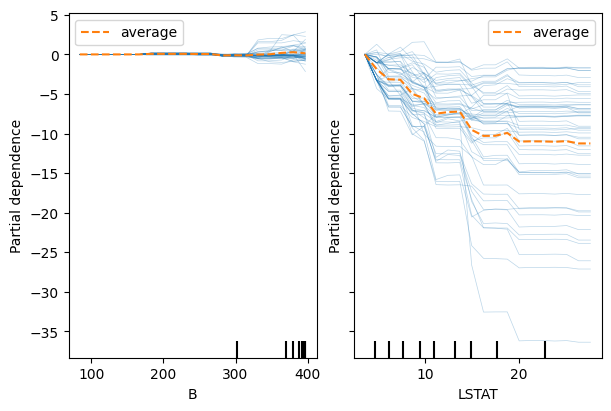

In [19]:
_, ax = plt.subplots(
    ncols=2,figsize=(6, 4),sharey=True, constrained_layout=True
)

features_info ={
    "features":['B', 'LSTAT'],
    "kind":"both",
    "centered":True
}
display=PartialDependenceDisplay.from_estimator(
    model,X_train,
    **features_info,
    ax=ax,
    **common_params
)

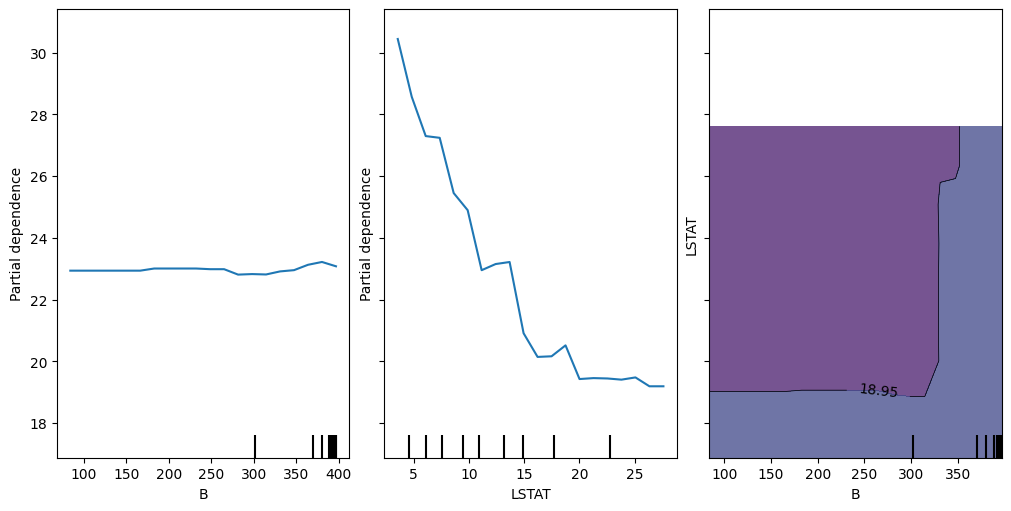

In [20]:
_, ax = plt.subplots(
    ncols=3,figsize=(10, 5),sharey=True, constrained_layout=True
)

features_info ={
    "features":['B', 'LSTAT', ('B', 'LSTAT')],
    "kind":"average",
}
display=PartialDependenceDisplay.from_estimator(
    model,X_train,
    **features_info,
    ax=ax,
    **common_params
)

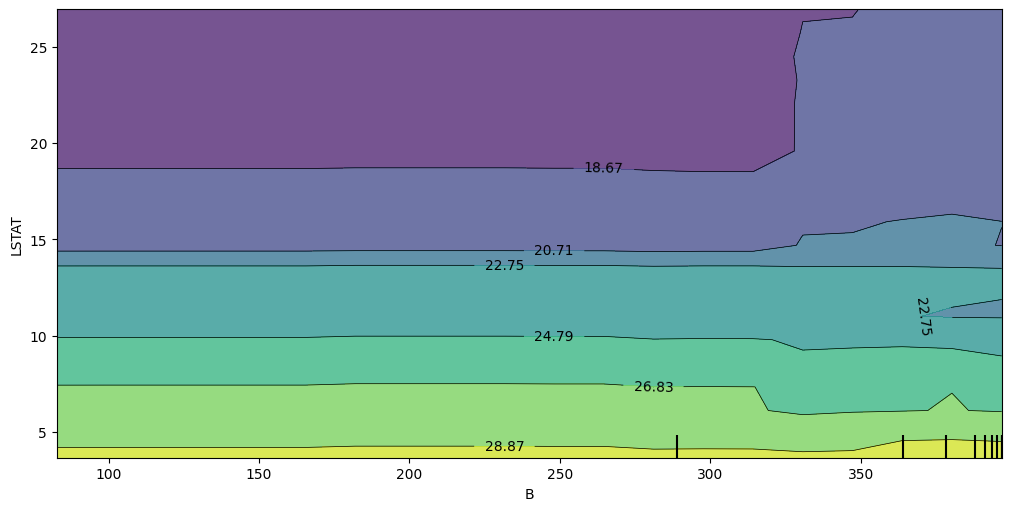

In [21]:
_, ax = plt.subplots(
    ncols=1,figsize=(10, 5),sharey=True, constrained_layout=True
)

features_info ={
    "features":[('B', 'LSTAT')],
    "kind":"average",
}
display=PartialDependenceDisplay.from_estimator(
    model,X,
    **features_info,
    ax=ax,
    **common_params
)

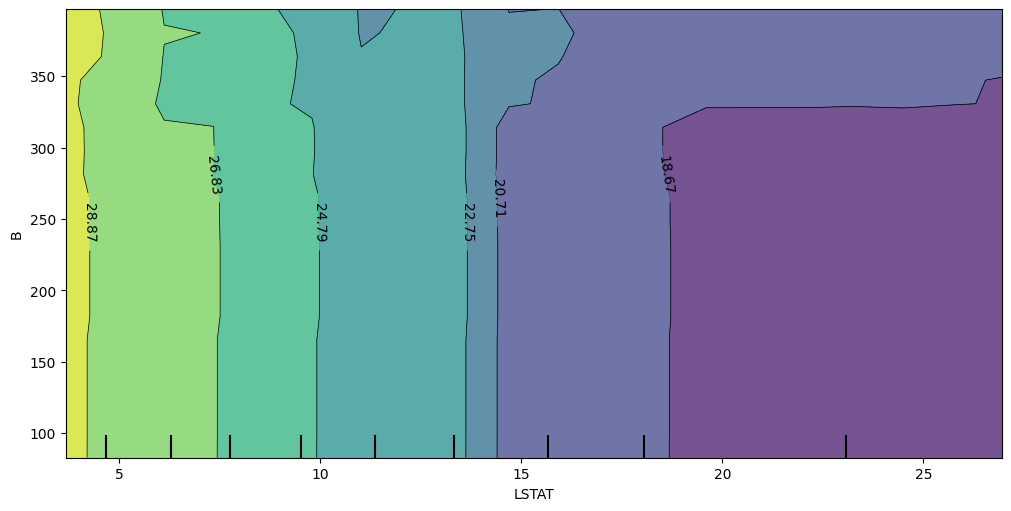

In [22]:
_, ax = plt.subplots(
    ncols=1,figsize=(10, 5),sharey=True, constrained_layout=True
)

features_info ={
    "features":[('LSTAT', 'B')],
    "kind":"average",
}
display=PartialDependenceDisplay.from_estimator(
    model,X,
    **features_info,
    ax=ax,
    **common_params
)